In [ ]:
# work on 8 features + churn


In [3]:
# Importing the libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv("dataset.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Drop customerID because it is unnecessary
df.drop('customerID', axis=1, inplace=True)

In [7]:
df.shape

(7043, 20)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.isna().sum()

gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

## Fill nan

In [10]:
# fill null values with the mean values of that feature
df["tenure"].fillna(df["tenure"].mean(), inplace=True)
# fill null values with the mode values of that feature is repeated more often than any other 
df["SeniorCitizen"].fillna(df["SeniorCitizen"].mode()[0], inplace=True)


In [11]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

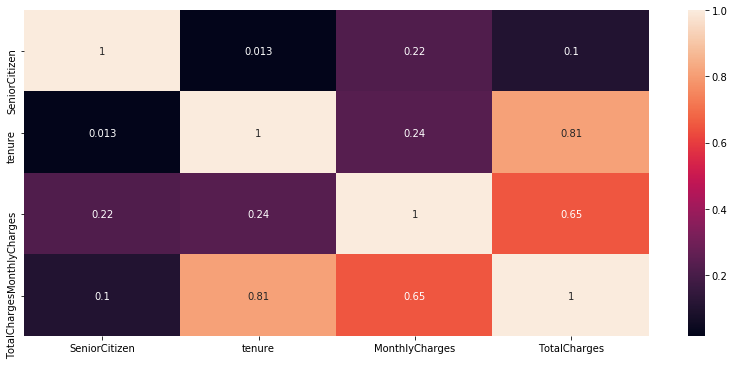

In [12]:
corr=df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr,annot=True)

### Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

df['tenure']=sc.fit_transform(df['tenure'].values.reshape(-1,1))
df['MonthlyCharges']=sc.fit_transform(df['MonthlyCharges'].values.reshape(-1,1))
df['TotalCharges']=sc.fit_transform(df['TotalCharges'].values.reshape(-1,1))

### Label encoding 

In [14]:
df['Partner'].dtype

dtype('O')

In [15]:
if df['Partner'].dtype == 'O':
    print('yes')
else:
    print('no')

yes


In [16]:
from sklearn.preprocessing import LabelEncoder

le = {}
le_name_mapping = {}

for i in df.columns:
    if df[i].dtype == 'O':
        le[i] = LabelEncoder()
        df[i] = le[i].fit_transform(df[i])
        le_name_mapping[i] = dict(zip(le[i].classes_, le[i].transform(le[i].classes_)))  
        print(i,":-",le_name_mapping[i])

gender :- {'Female': 0, 'Male': 1}
Partner :- {'No': 0, 'Yes': 1}
Dependents :- {'No': 0, 'Yes': 1}
PhoneService :- {'No': 0, 'Yes': 1}
MultipleLines :- {'No': 0, 'No phone service': 1, 'Yes': 2}
InternetService :- {'DSL': 0, 'Fiber optic': 1, 'No': 2}
OnlineSecurity :- {'No': 0, 'No internet service': 1, 'Yes': 2}
OnlineBackup :- {'No': 0, 'No internet service': 1, 'Yes': 2}
DeviceProtection :- {'No': 0, 'No internet service': 1, 'Yes': 2}
TechSupport :- {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingTV :- {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingMovies :- {'No': 0, 'No internet service': 1, 'Yes': 2}
Contract :- {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
PaperlessBilling :- {'No': 0, 'Yes': 1}
PaymentMethod :- {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
Churn :- {'No': 0, 'Yes': 1}


In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994971,0
1,1,0.0,0,0,0.039732,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173876,0
2,1,0.0,0,0,-1.286708,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960399,1
3,1,0.0,0,0,0.495696,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195400,0
4,0,0.0,0,0,-1.286708,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.941193,1


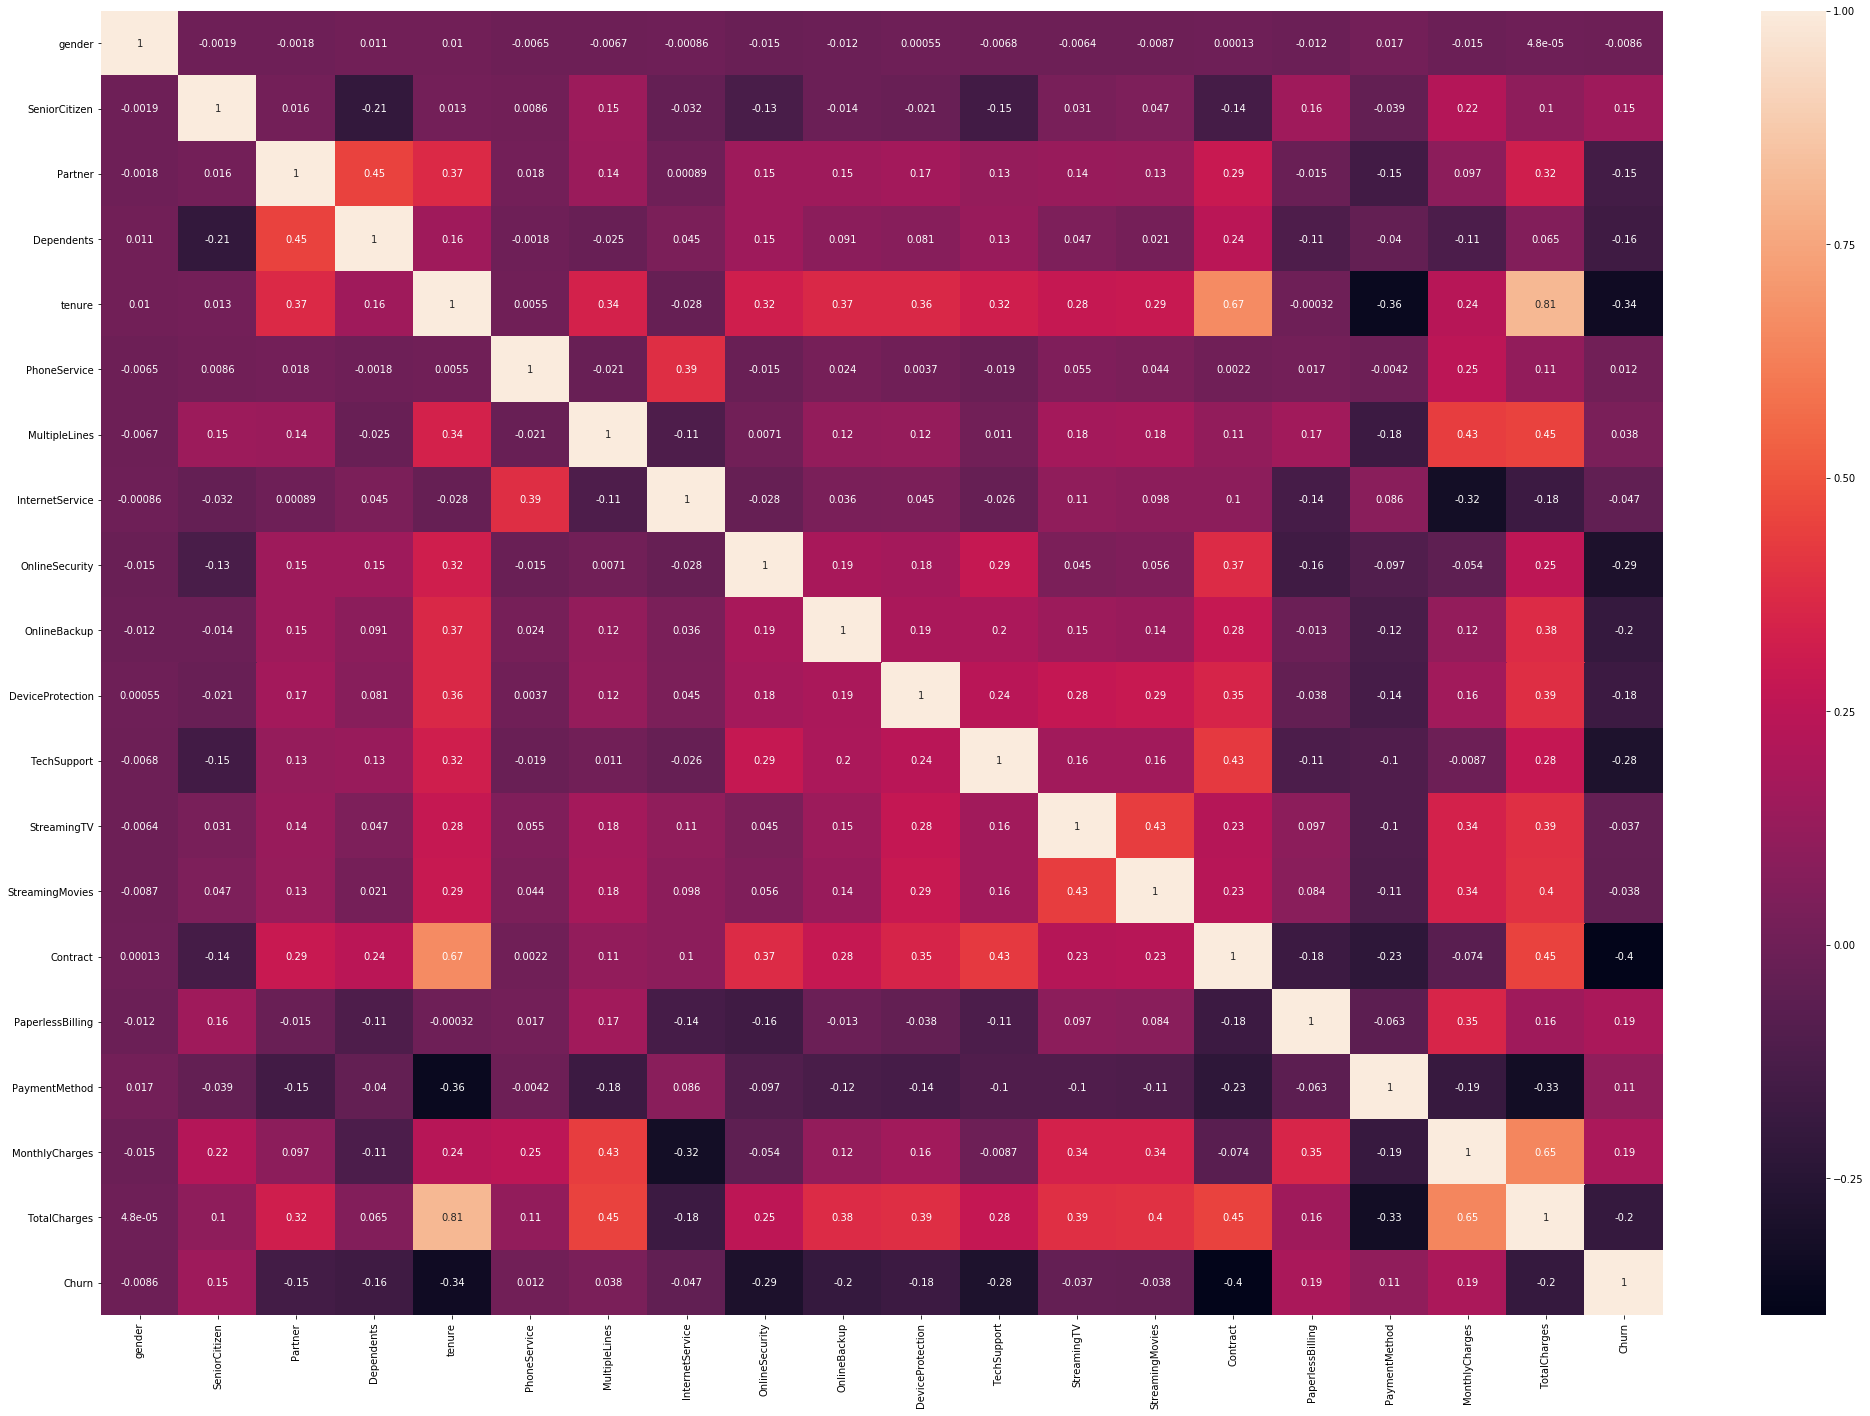

In [18]:
corr=df.corr()
plt.figure(figsize=(35,24))
sns.heatmap(corr,annot=True)

In [19]:
corr


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.010031,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.013338,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.370704,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.158957,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.010031,0.013338,0.370704,0.158957,1.000000,0.005542,0.335418,-0.028410,0.320131,0.366365,0.364516,0.318666,0.282687,0.289200,0.666452,-0.000324,-0.358755,0.236084,0.814245,-0.341083
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.005542,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.335418,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.028410,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.320131,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.366365,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


In [20]:
X = df[['gender', 'SeniorCitizen', 'tenure', 'OnlineSecurity', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]
y = df['Churn']

In [21]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

* The data is biased to 0 so i'll use over sampling

## OVER SAMPLING

In [22]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))


[(0, 5174), (1, 5174)]


##  Splitting the dataset into the Training set and Test set


In [23]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [24]:
print(y_train.shape)
#y_train.value_counts()

(6933,)


* the ratio of label 0 = 73.696 % from y train

In [25]:
print(y_test.shape)
#y_test.value_counts()

(3415,)


* the ratio of label 0 = 72.989 % from y test

## Logistic Regression

In [26]:
# Importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fitting Logistic Regression to the Training set
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
# Predicting the Test set results
y_pred = log_reg.predict(X_test)

# accuracy
print('Accuracy for train= ',round(log_reg.score(X_train,y_train),4) *100, '%')

print('Accuracy for test = ',round(accuracy_score(y_test,y_pred),4) *100, '%')
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.

cm_log_reg = confusion_matrix(y_test, y_pred)
print(cm_log_reg)

print(classification_report(y_test, y_pred))

/home/marie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for train=  74.6 %
Accuracy for test =  76.22 %
[[1247  483]
 [ 329 1356]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1730
           1       0.74      0.80      0.77      1685

   micro avg       0.76      0.76      0.76      3415
   macro avg       0.76      0.76      0.76      3415
weighted avg       0.76      0.76      0.76      3415



## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
# Accuracy
print('Accuracy for train = ',round(knn.score(X_train,y_train),4) *100, '%\n')
print('Accuracy for test = ',round(accuracy_score(y_test,knn_pred),4) *100, '%\n')

# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.

cm_knn = confusion_matrix(y_test, knn_pred)
print('Confusion Matrix :- \n',cm_knn)

print(classification_report(y_test, knn_pred))

Accuracy for train =  83.86 %

Accuracy for test =  77.36 %

Confusion Matrix :- 
 [[1226  504]
 [ 269 1416]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1730
           1       0.74      0.84      0.79      1685

   micro avg       0.77      0.77      0.77      3415
   macro avg       0.78      0.77      0.77      3415
weighted avg       0.78      0.77      0.77      3415



In [28]:
import sklearn.metrics as metrics
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print ('k = ',k,'-> accuracy : ',accuracy)

k =  1 -> accuracy :  0.8489019033674964
k =  2 -> accuracy :  0.7964860907759883
k =  3 -> accuracy :  0.788579795021962
k =  4 -> accuracy :  0.7724743777452416
k =  5 -> accuracy :  0.7736456808199121
k =  6 -> accuracy :  0.767203513909224
k =  7 -> accuracy :  0.7730600292825769
k =  8 -> accuracy :  0.7701317715959004
k =  9 -> accuracy :  0.7727672035139093
k =  10 -> accuracy :  0.767203513909224
k =  11 -> accuracy :  0.771303074670571
k =  12 -> accuracy :  0.7666178623718888
k =  13 -> accuracy :  0.7683748169838945
k =  14 -> accuracy :  0.7727672035139093
k =  15 -> accuracy :  0.7724743777452416
k =  16 -> accuracy :  0.7648609077598829
k =  17 -> accuracy :  0.7595900439238653
k =  18 -> accuracy :  0.7622254758418741
k =  19 -> accuracy :  0.7584187408491947
k =  20 -> accuracy :  0.7587115666178623
k =  21 -> accuracy :  0.7590043923865301
k =  22 -> accuracy :  0.7590043923865301
k =  23 -> accuracy :  0.7610541727672036
k =  24 -> accuracy :  0.7616398243045388
k =  

In [29]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')

1  :  84.89 %


In [30]:
m=score.index(max(score))+1
knn = KNeighborsClassifier(n_neighbors=m)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
# Accuracy
print('Accuracy for train = ',round(knn.score(X_train,y_train),4) *100, '%\n')

print('Accuracy for test = ',round(accuracy_score(y_test,knn_pred),4) *100, '%\n')


# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, knn_pred)
print('Confusion Matrix :- \n',cm_knn)
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))


Accuracy for train =  99.78 %

Accuracy for test =  84.89 %

Confusion Matrix :- 
 [[1350  380]
 [ 136 1549]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1730
           1       0.80      0.92      0.86      1685

   micro avg       0.85      0.85      0.85      3415
   macro avg       0.86      0.85      0.85      3415
weighted avg       0.86      0.85      0.85      3415



In [31]:
train_accuracy=np.empty(len(range(1,100)))
test_accuracy=np.empty(len(range(1,100)))
for i, k in enumerate(range(1,100)):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
     #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

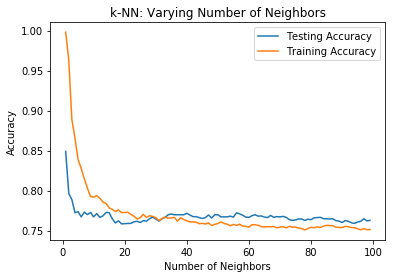

In [32]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(range(1,100), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,100), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## SVM

In [33]:
from sklearn.svm import SVC
svm_rbf=SVC(kernel='rbf').fit(X_train,y_train)
svm_rbf_pred=svm_rbf.predict(X_test)
# Accuracy
print('Accuracy for train = ',round(svm_rbf.score(X_train, y_train),2) *100, '%\n')

print('Accuracy for test = ',round(accuracy_score(y_test,svm_rbf_pred),4) *100, '% \n')
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
cm_svm_rbf = confusion_matrix(y_test, svm_rbf_pred)
print('Confusion Matrix :- \n',cm_svm_rbf)
print(classification_report(y_test, svm_rbf_pred))

/home/marie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for train =  75.0 %

Accuracy for test =  76.87 % 

Confusion Matrix :- 
 [[1245  485]
 [ 305 1380]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1730
           1       0.74      0.82      0.78      1685

   micro avg       0.77      0.77      0.77      3415
   macro avg       0.77      0.77      0.77      3415
weighted avg       0.77      0.77      0.77      3415



In [34]:
svm_linear=SVC(kernel='linear').fit(X_train,y_train)
svm_pred=svm_linear.predict(X_test)
# Accuracy
print('Accuracy for train = ',round(svm_linear.score(X_train, y_train),3) *100, '%\n')

print('Accuracy for test = ',round(accuracy_score(y_test,svm_pred),4) *100, '% \n')
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
cm_svm_lin = confusion_matrix(y_test, svm_pred)
print('Confusion Matrix :- \n',cm_svm_lin)

print(classification_report(y_test, svm_pred))

Accuracy for train =  72.8 %

Accuracy for test =  73.06 % 

Confusion Matrix :- 
 [[1004  726]
 [ 194 1491]]
              precision    recall  f1-score   support

           0       0.84      0.58      0.69      1730
           1       0.67      0.88      0.76      1685

   micro avg       0.73      0.73      0.73      3415
   macro avg       0.76      0.73      0.73      3415
weighted avg       0.76      0.73      0.72      3415



In [35]:
svm_poly=SVC(kernel='poly').fit(X_train,y_train)
svm_polr_pred=svm_poly.predict(X_test)
# Accuracy
print('Accuracy for train = ',round(svm_poly.score(X_train, y_train),3) *100, '%\n')

print('Accuracy for test = ',round(accuracy_score(y_test,svm_polr_pred),4) *100, '% \n')
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
cm_svm_polr = confusion_matrix(y_test, svm_polr_pred)
print('Confusion Matrix :- \n',cm_svm_polr)
print(classification_report(y_test, svm_polr_pred))

/home/marie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for train =  74.1 %

Accuracy for test =  76.22 % 

Confusion Matrix :- 
 [[1160  570]
 [ 242 1443]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74      1730
           1       0.72      0.86      0.78      1685

   micro avg       0.76      0.76      0.76      3415
   macro avg       0.77      0.76      0.76      3415
weighted avg       0.77      0.76      0.76      3415



## Naive bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB().fit(X_train,y_train)
nb_pred=nb.predict(X_test)
# Accuracy
print('Accuracy for train = ',round(nb.score(X_train, y_train),3) *100, '%\n')

print('Accuracy for test = ',round(accuracy_score(y_test,nb_pred),4) *100, '%\n')
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
cm_nb = confusion_matrix(y_test, nb_pred)
print('Confusion Matrix :- \n',cm_nb)
print(classification_report(y_test, nb_pred))

Accuracy for train =  74.6 %

Accuracy for test =  76.13 %

Confusion Matrix :- 
 [[1222  508]
 [ 307 1378]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1730
           1       0.73      0.82      0.77      1685

   micro avg       0.76      0.76      0.76      3415
   macro avg       0.76      0.76      0.76      3415
weighted avg       0.77      0.76      0.76      3415



In [37]:

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

# Predicting the Test set results
y_pred_dt = dt.predict(X_test)
# Accuracy
print('Accuracy for train = ',round(dt.score(X_train, y_train),3) *100, '%\n')
print('Accuracy for test = ',round(accuracy_score(y_test,y_pred_dt),3) *100, '%\n')

# Making the Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix :- \n',cm_dt)

print(classification_report(y_test, y_pred_dt))

Accuracy for train =  99.9 %

Accuracy for test =  85.1 %

Confusion Matrix :- 
 [[1335  395]
 [ 113 1572]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1730
           1       0.80      0.93      0.86      1685

   micro avg       0.85      0.85      0.85      3415
   macro avg       0.86      0.85      0.85      3415
weighted avg       0.86      0.85      0.85      3415



## RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
rfc=RandomForestClassifier(n_estimators=10,random_state=45,criterion='gini').fit(X_train,y_train)

# Predicting the Test set results
rfc_pred=rfc.predict(X_test)

# Accuracy
print('Accuracy for train = ',round(rfc.score(X_train, y_train),3) *100, '%\n')
print('Accuracy for test = ',round(accuracy_score(y_test,rfc_pred),3) *100, '%\n')

# Making the Confusion Matrix
cm_dt = confusion_matrix(y_test, rfc_pred)
print('Confusion Matrix :- \n',cm_dt)

print(classification_report(y_test, rfc_pred))

Accuracy for train =  99.1 %

Accuracy for test =  86.9 %

Confusion Matrix :- 
 [[1422  308]
 [ 140 1545]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1730
           1       0.83      0.92      0.87      1685

   micro avg       0.87      0.87      0.87      3415
   macro avg       0.87      0.87      0.87      3415
weighted avg       0.87      0.87      0.87      3415



In [47]:
# pickle.dump(rfc,open("rfc.pkl","wb"))

In [42]:
# my_rfc=pickle.load(open("rfc.pkl","rb"))         